In [1]:
import zmq

In [ ]:
class OpenEphysSocket(object):
    """
    Configuration on Windows:
    - enable port (e.g. 5556) via Firewall rule. Control Panel -> Network and Internet ->
        Network and Sharing Center -> Windows Firewall; New Rule -> Custom
    - check open port via "telnet <IP> <port>" (enabling telnet client via Control Panel ->
        Programs -> Turn Windows feature on or off; check Telnet Client. Then install with
        pkgmgr /iu:"TelnetClient")
    - network policies: cmd (WinKey+R) -> "secpol.msc" -> Network List Manager Policies
    - test the latency / bandwidth: iperf (https://openmaniak.com/iperf.php):
        iperf3.exe -c 192.168.0.2 -p 5556
        iperf3.exe -s -p 5556
    """

    def __init__(self, hostname='localhost', port=5556, verbose=False):
        self.verbose = verbose

        # TODO use Polls with timeouts etc.

        self.ctx = zmq.Context()
        self.sock = self.ctx.socket(zmq.REQ)
        self.sock.setsockopt(zmq.LINGER, 0)
        self.sock.setsockopt(zmq.RCVTIMEO, 5000)  # in millis

        self.sock.connect('tcp://%s:%d' % (hostname, port))

    def __del__(self):
        """ deleting should terminate Context / Socket """
        self.sock.__exit__()
        self.ctx.__exit__()

    def send_message(self, message):
        self.sock.send_string(message)
        return self.sock.recv_string()

    @verbose
    def start_aqcuisition(self):
        return self.send_message('StartAcquisition')

    @verbose
    def stop_aqcuisition(self):
        return self.send_message('StopAcquisition')

    @verbose
    def start_record(self, rec_dir):
        """
        :param rec_dir:     path to store the data to. OpenEphys will create
                            another folder like YYYY-MM-DD_HH-MM-SS inside
        """
        if rec_dir is not None:
            return self.send_message('StartRecord RecDir=%s' % rec_dir)
        return self.send_message('StartRecord')

    @verbose
    def stop_record(self):
        return self.send_message('StopRecord')


In [3]:
import numpy as np
import matplotlib.pyplot as plt

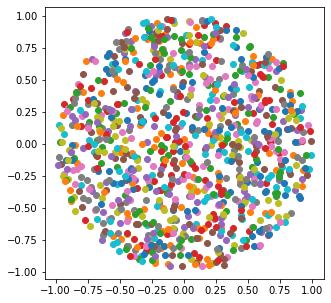

In [6]:
def get_xy():
    rho = np.sqrt(np.random.rand())
    phi = np.random.rand() * 2 * np.pi

    x = rho * np.sin(phi)
    y = rho * np.cos(phi)
    return x, y

fig = plt.figure(figsize=(5,5))

ax = fig.add_subplot(111)
for i in range(1000):
    x, y = get_xy()
    ax.scatter(x, y)